<a href="https://colab.research.google.com/github/Danie8904/Posicionamiento-de-Marca/blob/main/Posicionamiento_Marca_Clase9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bienvenidos a 3do cuaderno (Notebook) en Jupyter - Python**


## Analítica para Mercadeo
## Especialización en Analítica en Big Data
### Practica: Posicionamiento de Marca

# **Conexión Drive**

In [ ]:
# Lectura de archivos en el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importar Librerias

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
!pip install prince -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 8.3 MB/s eta 0:00:00


## **Una manera rapida de asociar percepciones sobre una marca**

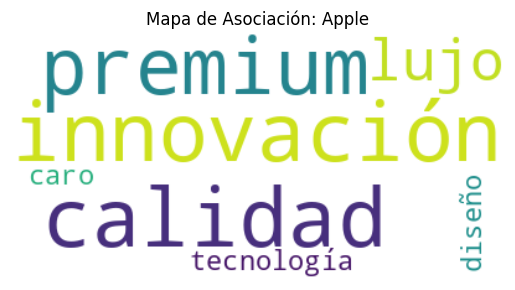

In [ ]:
from wordcloud import WordCloud

texto = "innovación calidad premium lujo tecnología diseño caro"
wc = WordCloud(background_color='white').generate(texto)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Mapa de Asociación: Apple')
plt.show()


# **1. Analisis Correspondencia Simple (CA - Simple)**

Imaginemos que se recolecta formación a traves de una encuesta a 200 personas y se les pide que asocien estas marcas con los atributos que mejor las describen:

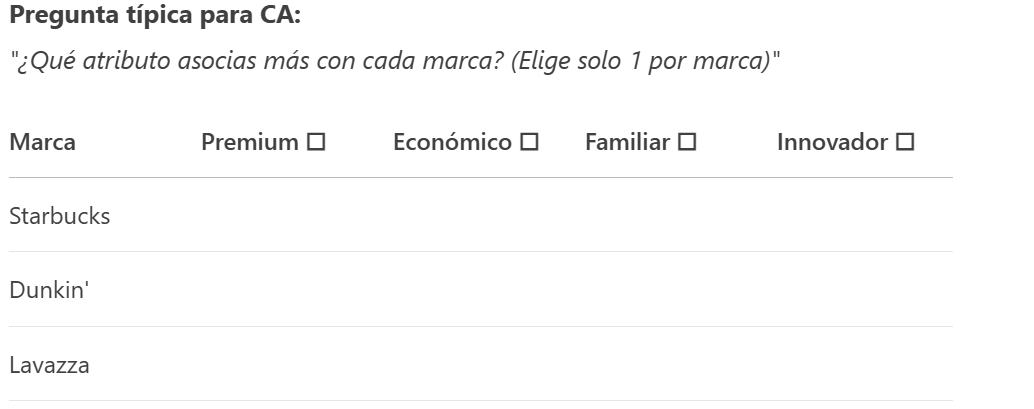

Para el CA, se necesitará contar cuántas personas eligieron cada combinación marca-atributo, es de decir convertir los datos a una tabla de Contingencia

## 1.1 Lectura de datos

In [ ]:
data=pd.read_excel("/content/drive/MyDrive/Analítica Para Mercadeo/Base de datos/Ejemplo Mapa de Posicionamiento.xlsx",sheet_name="Cafe_4_Atributos")
data

,Marca,Premium,Económico,Familiar,Innovador
0,Starbucks,50,20,30,40
1,Dunkin',15,60,35,10
2,Lavazza,40,25,20,45
3,Juan Valdez,45,15,60,40


## **Conclusión**



*   50 en Starbucks-Premium: 50 personas eligieron "Premium" para Starbucks.
*   60 en Dunkin'-Económico: 60 personas eligieron "Económico" para Dunkin'.

## 1.2 Analisis Correspondecia Dos Atributos

In [ ]:
# Seleccionamos solo dos atributos (2 características)
data2 = data[["Marca", "Premium", "Económico"]]

In [ ]:
data2

,Marca,Premium,Económico
0,Starbucks,50,20
1,Dunkin',15,60
2,Lavazza,40,25
3,Juan Valdez,45,15


In [ ]:
# Graficamos
import plotly.express as px

# Gráfico interactivo
fig = px.scatter(data2, x='Premium', y='Económico', text='Marca',
                 title='Mapa Perceptual de Marcas de Café',
                 labels={'Premium': 'Percepción de Premium', 'Económico': 'Percepción de Económico'},
                 width=800, height=600)

# Ajustes visuales
fig.update_traces(marker=dict(size=18, color='saddlebrown', line=dict(width=2, color='black')))
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()

## **Conclusión:**



*   Las marcas ubicadas en el cuadrante superior izquierdo serían percibidas como más económicas y menos premium. (DUNKIN)
*   Las marcas en el cuadrante inferior derecho serían más premium y menos económicas (Juan Valdes, Starbucks, Lavazza)
*   Elemento de lista: Este gráfico ayuda a visualizar el posicionamiento relativo de las marcas según estas dos dimensiones.

## 1.3 Prueba Chi - Cuadrado

La prueba chi-cuadrado de independencia se utiliza cuando tienes dos variables categóricas y quieres saber si están relacionadas.

En nuestro caso, los datos representan frecuencias de percepción en dos categorías ("Premium" y "Económico") para distintas marcas. Entonces, podemos aplicar una prueba de chi-cuadrado de independencia para saber si existe una relación significativa entre la marca y el tipo de percepción.

In [ ]:
from scipy.stats import chi2_contingency

data2 = pd.DataFrame(data2)
data2.set_index('Marca', inplace=True)

# Prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(data2)

# Resultados
print("Chi-cuadrado:", chi2)
print("Grados de libertad:", dof)
print("Valor p:", p)
print("Frecuencias esperadas:")
print(pd.DataFrame(expected, index=data2.index, columns=data2.columns))

Chi-cuadrado: 55.67266483516483
Grados de libertad: 3
Valor p: 4.933967469411451e-12
Frecuencias esperadas:
               Premium  Económico
Marca                            
Starbucks    38.888889  31.111111
Dunkin'      41.666667  33.333333
Lavazza      36.111111  28.888889
Juan Valdez  33.333333  26.666667


## **Conclusión:**



1.   El P-Value es extremadamente pequeño (mucho menor que 0.05):
2.   Existe una relación estadísticamente significativa entre la marca de café y el tipo de percepción (Premium vs Económico).
3. Esto significa que las percepciones no son independientes de la marca: es decir, algunas marcas tienden a ser percibidas más como "premium" y otras más como "económicas", y esa diferencia no se debe al azar.

## 1.4 Analisis Correspondecia más de dos atributos

In [ ]:
# Lectura de datos
data=pd.read_excel("/content/drive/MyDrive/Analítica Para Mercadeo/Base de datos/Ejemplo Mapa de Posicionamiento.xlsx",sheet_name="Cafe_4_Atributos")
data

,Marca,Premium,Económico,Familiar,Innovador
0,Starbucks,50,20,30,40
1,Dunkin',15,60,35,10
2,Lavazza,40,25,20,45
3,Juan Valdez,45,15,60,40


In [ ]:
# Tabla de contigencia
from prince import CA

data= pd.DataFrame(data).set_index("Marca")
print("Tabla de contingencia (frecuencias):")
data

Tabla de contingencia (frecuencias):


,Premium,Económico,Familiar,Innovador
Marca,,,,
Starbucks,50,20,30,40
Dunkin',15,60,35,10
Lavazza,40,25,20,45
Juan Valdez,45,15,60,40


In [ ]:
# Creamos y ajustamos el modelo CA
ca = CA(n_components=2, n_iter=10, random_state=42)
ca.fit(data)

In [ ]:
# Obtenemos las coordenadas
coordenadas_marcas = ca.row_coordinates(data)
coordenadas_atributos = ca.column_coordinates(data)

In [ ]:
# Obtenemos la varianza explicada
varianza_explicada = ca.eigenvalues_ / ca.total_inertia_
print(f"\nVarianza explicada Dimensión 1: {varianza_explicada[0]:.1%}")
print(f"Varianza explicada Dimensión 2: {varianza_explicada[1]:.1%}")


Varianza explicada Dimensión 1: 79.5%
Varianza explicada Dimensión 2: 19.2%


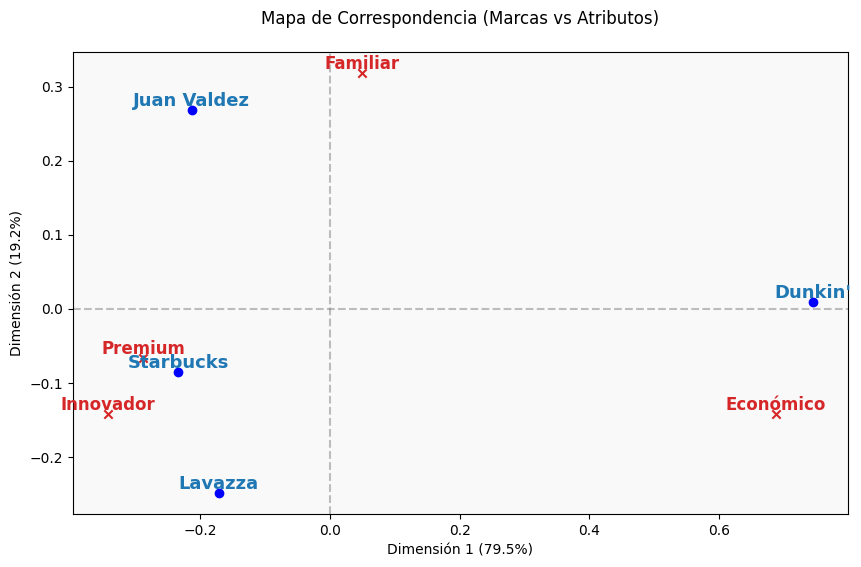

In [ ]:
# Gráficamos en 2D

plt.figure(figsize=(10, 6))

# Marcas son los puntos azules
plt.scatter(coordenadas_marcas[0], coordenadas_marcas[1], c='blue')
for i, marca in enumerate(data.index):
    plt.text(coordenadas_marcas.iloc[i, 0], coordenadas_marcas.iloc[i, 1], marca,
             fontsize=13, ha='center', va='bottom',fontweight='bold', c='#1f77b4')

# Atributos son los puntnos rojos
plt.scatter(coordenadas_atributos[0], coordenadas_atributos[1], c='#d62728', marker='x')
for i, atributo in enumerate(data.columns):
    plt.text(coordenadas_atributos.iloc[i, 0], coordenadas_atributos.iloc[i, 1], atributo,
             fontsize=12, ha='center', va='bottom', color='red',fontweight='bold',c='#d62728')

# Configuración del gráfico
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.title("Mapa de Correspondencia (Marcas vs Atributos)", pad=20)
plt.xlabel(f"Dimensión 1 ({varianza_explicada[0]:.1%})")
plt.ylabel(f"Dimensión 2 ({varianza_explicada[1]:.1%})")
#plt.grid(True)
plt.gca().set_facecolor('#f9f9f9')
plt.show()


## **Conclusión:**

### **Notas claves para interpretar el mapa:**


1.   Marcas cercanas = Percepción similar (ej: Starbucks y Lavazza están cerca, se perciben como similares).
2.   Atributos cercanos a marcas = Asociación fuerte (ej: Dunkin' está cerca de "Económico").
3. Atributos opuestos = Son mutuamente excluyentes (ej: "Premium" y "Económico" están en lados opuestos).

### **Conclusiones del ejemplo**:

1.   Starbucks y Lavazza se asocian con Premium e Innovador
2.   Dunkin' se percibe como Económico y Familiar.
3.   Juan Valdez se asocia con Familiar
4.   "Premium" y "Económico" son atributos antagónicos (ninguna marca está cerca de ambos).

### **Adaptación en el marketing:**

1.   Identificar oportunidades de posicionamiento (ej: Si ninguna marca está cerca e "Innovador", podrías posicionarte ahí).
2.   Detectar competidores directos (marcas cercanas en el mapa).
3. Validar estrategias de branding (¿tu marca está donde querías?)

### 1.5 Prueba Chi - Cuadrado CA 4 Atributos

In [ ]:
from scipy.stats import chi2_contingency

# Ejecutamos el test Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(data)

# Mostramos la tabla esperada
expected_df = pd.DataFrame(expected, index=data.index, columns=data.columns)
print("Tabla esperada bajo independencia:")
print(expected_df.round(2))


# Valor total de Chi-cuadrado y p-valor
print(f"\nChi-cuadrado total: {chi2:.2f}")
print(f"Valor p: {p:.4e}")

Tabla esperada bajo independencia:
             Premium  Económico  Familiar  Innovador
Marca                                               
Starbucks      38.18      30.55     36.91      34.36
Dunkin'        32.73      26.18     31.64      29.45
Lavazza        35.45      28.36     34.27      31.91
Juan Valdez    43.64      34.91     42.18      39.27

Chi-cuadrado total: 107.24
Valor p: 5.3537e-19


## **Conclusión**:

1.   El P-Value es extremadamente pequeño (mucho menor que 0.05):
2.   Existe una relación estadísticamente significativa entre la marca de café y el tipo de percepción (Premium,  Económico, Familiar, Innvador).
3. Esto significa que las percepciones no son independientes de la marca: es decir, algunas marcas tienden a ser percibidas más como "premium" y otras más como "económicas", ademas algunas marcas son percibidas como innnovadores y otrasno y estas diferencia no se debe al azar.

# **2. Analisis Correspondencia Múltiple (MCA - Múltiple)**

Para el ejercicio se entrevistó a 26 personas que evaluaron 4 marcas de café según 3 atributos:

## 2.1 Lectura de datos

In [ ]:
data_m=pd.read_excel("/content/drive/MyDrive/Analítica Para Mercadeo/Base de datos/Ejemplo Mapa de Posicionamiento.xlsx",sheet_name="Cafe")
data_m.head()

,ID,Marca,Aroma,Sabor,Presentación
0,1,Águila Roja,Fuerte,Dulce,Moderna
1,2,Águila Roja,Suave,Amargo,Tradicional
2,3,Oma,Suave,Amargo,Moderna
3,4,Oma,Fuerte,Dulce,Tradicional
4,5,Juan Valdez,Suave,Dulce,Moderna


Notas:

1. El MCA está diseñado exclusivamente para variables categóricas. No acepta directamente:

* variables numéricas (como ingresos, edad, frecuencia, etc.),

* ni tablas de frecuencias absolutas (como sí lo hace el Análisis de Correspondencias Simple CA).

In [ ]:
# Seleccionar solo las variables perceptuales
variables = ['Aroma', 'Sabor', 'Presentación']
datos_perceptuales = data_m[variables]

Nota:

Se recomienda separar la columna 'Marca' es fundamental en MCA:

1. MCA solo se aplica a variables categóricas que describen características. El objetivo del MCA es analizar cómo se relacionan las categorías de las variables descriptivas (en este caso: 'Aroma', 'Sabor', 'Presentación') entre sí y con los individuos.

2. 'Marca' no es una variable perceptual, sino el nombre del individuo, es decir, la "etiqueta" del café que responde esas características. Por eso no se debe incluirs en el análisis MCA.

3. Solo la usamos para identificar los puntos en el gráfico, no para calcular las dimensiones.

4. Si lo incluimos en el gráfico final tendría asociaciones no entre las características perceptivas, sino entre marcas específicas, lo que distorsiona el análisis.

5. Solo la usamos para rotular los puntos del gráfico.

In [ ]:
# Aplicamos MCA
import prince

mca = prince.MCA(n_components=2, random_state=42)
mca = mca.fit(datos_perceptuales)

In [ ]:
# Obtener las coordenadas
# Coordenadas de los individuos (observaciones)
coordenadas_ind = mca.transform(datos_perceptuales)
coordenadas_ind['Marca'] = data_m['Marca']  # Agregar la marca como etiqueta

In [ ]:
# Coordenadas de las modalidades (categorías)
coordenadas_mod = mca.column_coordinates(datos_perceptuales)

In [ ]:
# Varianzas explicadas
varianza_explicada = mca.eigenvalues_ / mca.total_inertia_
print(f"\nVarianza explicada Dimensión 1: {varianza_explicada[0]:.1%}")
print(f"Varianza explicada Dimensión 2: {varianza_explicada[1]:.1%}")


Varianza explicada Dimensión 1: 47.4%
Varianza explicada Dimensión 2: 34.4%


In [ ]:
print("Varianza explicada por componente:")
print(mca.eigenvalues_)

Varianza explicada por componente:
[0.47352494 0.34378964]


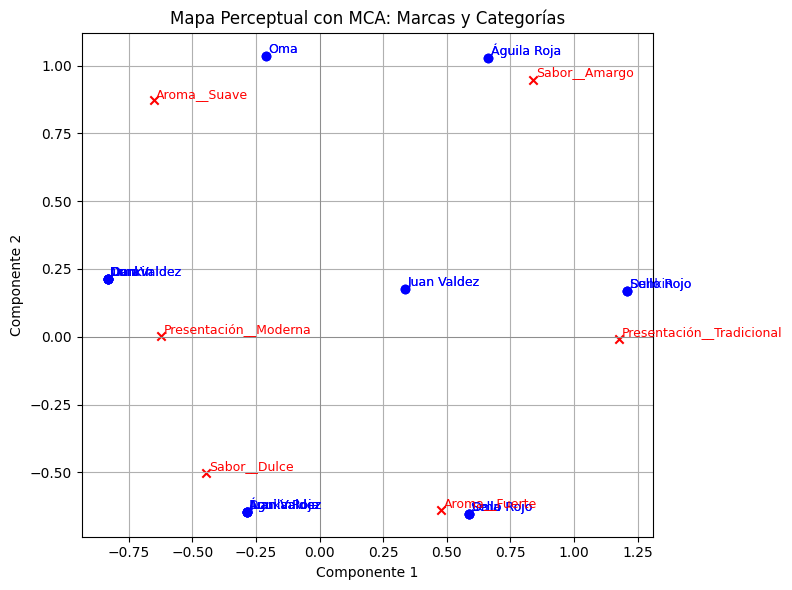

In [ ]:
# Graficamos el mapa perceptual


plt.figure(figsize=(8, 6))

# Graficamos las marcas
for i in range(len(coordenadas_ind)):
    x = coordenadas_ind.iloc[i, 0]
    y = coordenadas_ind.iloc[i, 1]
    marca = coordenadas_ind.iloc[i, 2]
    plt.scatter(x, y, color='blue')
    plt.text(x + 0.01, y + 0.01, marca, fontsize=9, color='blue')

# Graficamos modalidades (percepciones)
for i in range(len(coordenadas_mod)):
    x = coordenadas_mod.iloc[i, 0]
    y = coordenadas_mod.iloc[i, 1]
    modalidad = coordenadas_mod.index[i]
    plt.scatter(x, y, color='red', marker='x')
    plt.text(x + 0.01, y + 0.01, modalidad, fontsize=9, color='red')

# Líneas de referencia
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.title('Mapa Perceptual con MCA: Marcas y Categorías')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Promediar las coordenadas de los individuos por marca
coordenadas_promedio = coordenadas_ind.groupby('Marca')[[0, 1]].mean().reset_index()

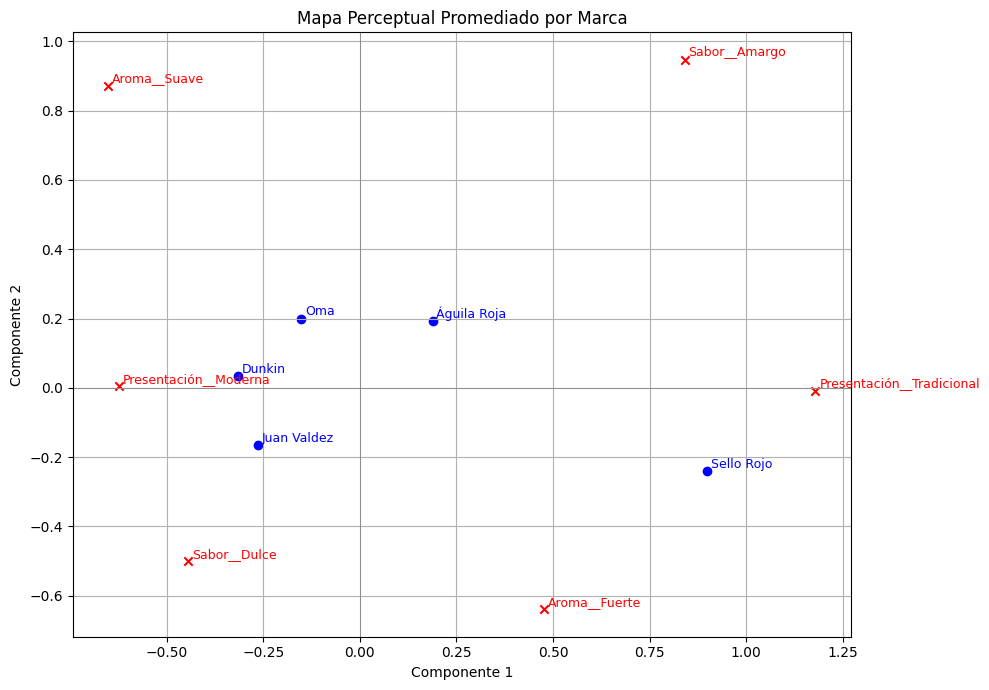

In [ ]:
plt.figure(figsize=(10, 7))

# Graficar marcas (promediadas)
for i in range(len(coordenadas_promedio)):
    x = coordenadas_promedio.iloc[i, 1]
    y = coordenadas_promedio.iloc[i, 2]
    marca = coordenadas_promedio.iloc[i, 0]
    plt.scatter(x, y, color='blue')
    plt.text(x + 0.01, y + 0.01, marca, fontsize=9, color='blue')

# Graficar modalidades (categorías)
for i in range(len(coordenadas_mod)):
    x = coordenadas_mod.iloc[i, 0]
    y = coordenadas_mod.iloc[i, 1]
    modalidad = coordenadas_mod.index[i]
    plt.scatter(x, y, color='red', marker='x')
    plt.text(x + 0.01, y + 0.01, modalidad, fontsize=9, color='red')

# Líneas de referencia
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.title('Mapa Perceptual Promediado por Marca')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Conclusiones**


1.   Componente 1 (horizontal) y Componente 2 (vertical)  son los dos primeros componentes principales del MCA.
2.   Puntos azules: Representan marcas de café (promedio de sus coordenadas individuales).

3. Puntos rojos: Son las categorías de las variables (Aroma, Sabor, Presentación).

4. La distancia entre una marca y una categoría sugiere afinidad perceptual. Ejemplo:Sello Rojo está muy cerca de Presentación_Tradicional, Aroma_Fuerte, y Sabor_Amargo.



# **3. Analisis de Componentes Principales (PCA)**

1. Se quiere conocer el posicionamiento que tienen 10 empresas, para ello se consultó sobre una muestra en relación a la opinión/reputación en base a 6 atributos. (precio, variedad, rapidez, información, trato, condiciones, acceso)

2. Se le pidió que califiquen de 1 a 10 cada atributo, los resultados se promediaron

## 3.1 Lectura de datos

In [ ]:
# leemos ruta drive donde está el excel
data_posicionamiento= pd.read_excel("/content/drive/MyDrive/Analítica Para Mercadeo/Base de datos/Ejemplo Mapa de Posicionamiento.xlsx",sheet_name="Empresas_Satisfacción")

In [ ]:
data_posicionamiento

,Características,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10
0,Precios,3.2,3.4,3.6,3.8,3.2,9.0,3.0,3.8,3.6,9.0
1,Variedad,1.6,3.0,3.6,3.4,5.4,4.0,1.6,2.8,10.0,10.0
2,Rapidez,4.0,4.0,4.6,4.2,5.8,4.0,3.8,3.6,5.0,5.8
3,Información,2.2,2.6,2.4,3.4,4.0,3.2,3.0,2.0,8.8,8.8
4,Trato,5.6,5.0,5.0,4.4,6.0,5.2,4.8,4.4,5.2,6.0
5,Condiciones,4.2,4.2,4.0,4.8,5.4,4.4,3.6,4.2,4.8,5.4
6,Acceso,4.2,4.2,4.2,4.6,5.2,3.0,3.2,3.6,4.2,5.2


In [ ]:
# La caracterista Empresa 'Características' la usamos como índice temporal
data = data_posicionamiento.set_index('Características')

# Transponemos la matriz
data_T = data.T

In [ ]:
data_T

Características,Precios,Variedad,Rapidez,Información,Trato,Condiciones,Acceso
E1,3.2,1.6,4.0,2.2,5.6,4.2,4.2
E2,3.4,3.0,4.0,2.6,5.0,4.2,4.2
E3,3.6,3.6,4.6,2.4,5.0,4.0,4.2
E4,3.8,3.4,4.2,3.4,4.4,4.8,4.6
E5,3.2,5.4,5.8,4.0,6.0,5.4,5.2
E6,9.0,4.0,4.0,3.2,5.2,4.4,3.0
E7,3.0,1.6,3.8,3.0,4.8,3.6,3.2
E8,3.8,2.8,3.6,2.0,4.4,4.2,3.6
E9,3.6,10.0,5.0,8.8,5.2,4.8,4.2
E10,9.0,10.0,5.8,8.8,6.0,5.4,5.2


## 3.2  Escalar datos



*   Se recomendable escalar los datos antes de aplicar PCA, especialmente cuando las variables tienen diferentes escalas o unidades (lo cual no es el caso aquí porque todas están en la misma escala de 1 a 10, pero igual es una buena práctica).
*   El escalado asegura que ninguna variable domine las componentes principales por tener una varianza mayor solo por su escala.





In [ ]:
## Escalamos los datos (requisito de PCA para cuando tenemos)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(data_T)

In [ ]:
# Convertir a DataFrame para mejor visualización
data_std_df = pd.DataFrame(data_std,
                          index=data_T.index,
                          columns=data_T.columns)
print("\nDatos estandarizados:")
data_std_df


Datos estandarizados:


Características,Precios,Variedad,Rapidez,Información,Trato,Condiciones,Acceso
E1,-0.608795,-1.005318,-0.631579,-0.752281,0.810931,-0.535373,0.056888
E2,-0.519267,-0.526595,-0.631579,-0.588742,-0.294884,-0.535373,0.056888
E3,-0.429738,-0.321428,0.157895,-0.670511,-0.294884,-0.892288,0.056888
E4,-0.340209,-0.389817,-0.368421,-0.261663,-1.400699,0.535373,0.625768
E5,-0.608795,0.294073,1.736842,-0.016354,1.548141,1.606119,1.479088
E6,1.987537,-0.184650,-0.631579,-0.343433,0.073721,-0.178458,-1.649752
E7,-0.698324,-1.005318,-0.894737,-0.425202,-0.663489,-1.606119,-1.365312
E8,-0.340209,-0.594984,-1.157895,-0.834051,-1.400699,-0.535373,-0.796432
E9,-0.429738,1.867019,0.684211,1.946118,0.073721,0.535373,0.056888
E10,1.987537,1.867019,1.736842,1.946118,1.548141,1.606119,1.479088


## 3.2 PCA

In [ ]:
# PCA con 2 componentes
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_std)

# DataFrame con resultados PCA (n_components=2)
pca_df = pd.DataFrame(pca_result,
                     columns=['PC1', 'PC2'],
                     index=data_T.index)

print("\nResultados PCA:")
print(pca_df)
print("\nVarianza explicada:", pca.explained_variance_ratio_)


Resultados PCA:
          PC1       PC2
E1  -1.038784 -0.816332
E2  -1.148372 -0.485604
E3  -0.878204 -0.503233
E4  -0.543531 -0.594424
E5   2.519670 -1.816758
E6  -0.724568  2.323509
E7  -2.530284  0.267713
E8  -2.166990  0.222339
E9   2.032008  0.422337
E10  4.479055  0.980453

Varianza explicada: [0.65182001 0.16384082]


## 3.3 Gráfico **Mapa Perceptual**

<ipython-input-48-cd17ca0f6eb5>:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



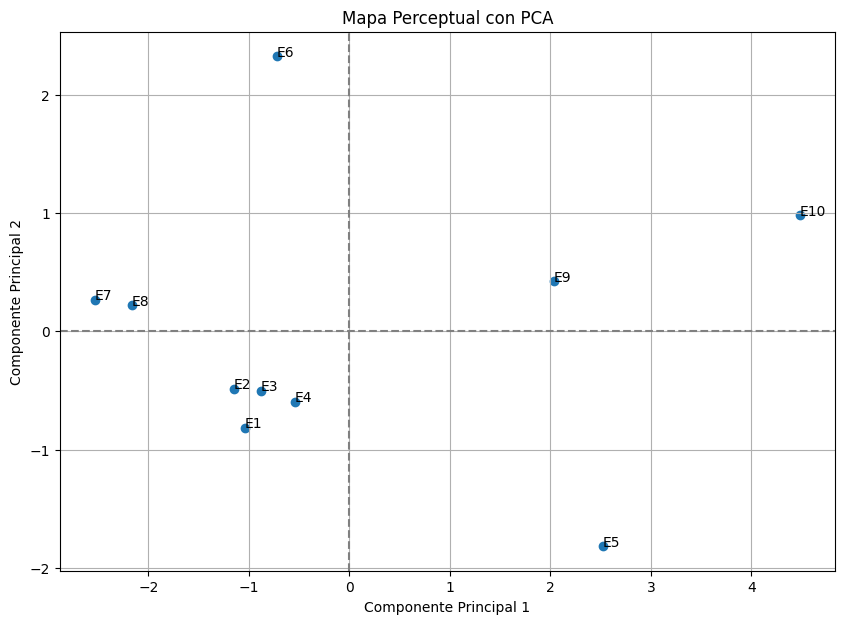

In [ ]:
# Graficar el mapa perceptual
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'])

for i, txt in enumerate(pca_df.index):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]))

plt.title('Mapa Perceptual con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

<ipython-input-49-0ddb254ac7b3>:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



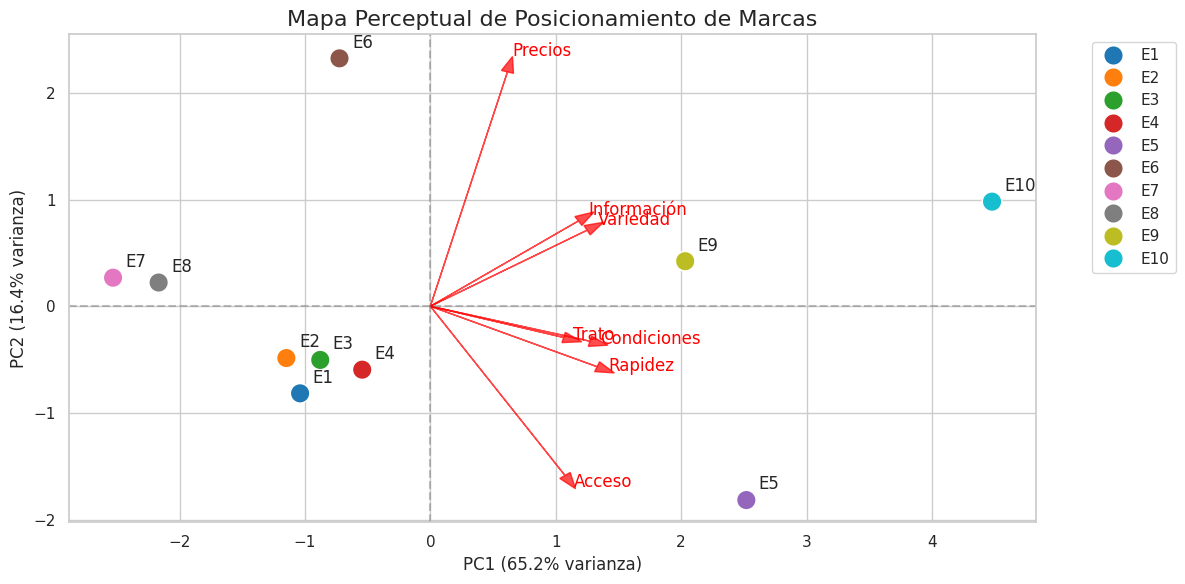

In [ ]:
## Graficar el mapa perceptual

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Scatter plot de marcas
scatter = sns.scatterplot(x='PC1', y='PC2',
                         data=pca_df,
                         s=200,
                         hue=pca_df.index,
                         palette='tab10')

# Etiquetas de marcas
for i, marca in enumerate(pca_df.index):
    plt.annotate(marca,
                (pca_df.PC1[i]+0.1, pca_df.PC2[i]+0.1),
                fontsize=12)

# Vectores de características
for i, feature in enumerate(data_T.columns):
    plt.arrow(0, 0,
              pca.components_[0,i]*3,
              pca.components_[1,i]*3,
              color='red',
              alpha=0.7,
              head_width=0.1)
    plt.text(pca.components_[0,i]*3.2,
             pca.components_[1,i]*3.2,
             feature,
             color='red',
             fontsize=12)

# Configuración del gráfico
plt.title('Mapa Perceptual de Posicionamiento de Marcas', fontsize=16)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)')
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## **Conclusiones**



1. PC1 (65.2% de varianza): Captura la mayor parte de la información. Diferencia especialmente a las empresas con altos puntajes en características como Acceso, Rapidez, Condiciones y Trato (extremo derecho) frente a las que tienen bajos puntajes en estas.

2. PC2 (16.4% de varianza): Captura otra dimensión importante. Diferencia, por ejemplo, a las empresas con alta valoración en Precios o Información (parte superior) frente a las que tienen menos énfasis en estas (parte inferior).


3. **Flechas rojas (variables originales):** Cada flecha representa una característica evaluada. La dirección y longitud indican:


*   Longitud: Qué tan influyente es la característica en la formación de los componentes (más larga = más influyente).
*   Dirección: Flechas cercanas a las características significa correlación.

* Flechas en direcciones opuestas a las características significa inversamente correlacionadas.

* **Ejemplo:** “Condiciones”, “Rapidez” y “Trato” apuntan en direcciones similares, es decir probablemente están correlacionadas.


4. **Puntos de colores (empresas E1 a E10):**
* Muestran cómo se posicionan las empresas según la percepción general de las características.

* Empresas cercanas entre sí se perciben como similares.

* Empresas alejadas son percibidas como diferentes.

5. E10: Se destaca en PC1 y PC2, muy bien percibida en características como Precios, Acceso, Variedad.

6. E6: Se diferencia en PC2, cerca de la flecha de Precios, probablemente muy valorada por sus precios.

7. E5: Está sola en la parte inferior derecha,  diferenciada por Acceso o características únicas.

8. E1 a E4: Agrupadas en la zona inferior izquierda, son empresas percibidas como similares, con puntajes más bajos en varias dimensiones.

9. E7 y E8: Juntas, alejadas del centro,  percepción muy baja en la mayoría de características.


## 3.4 Aplicar PCA sin limitar número de componentes

In [ ]:
# Escalamos los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_T)


pca = PCA()
components = pca.fit_transform(df_scaled)

# Crear DataFrame de resultados
componentes_df = pd.DataFrame(components,
                              columns=[f'PC{i+1}' for i in range(components.shape[1])],
                              index=data_T.index)

In [ ]:
componentes_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
E1,-1.038784,-0.816332,0.960396,0.562191,-0.074130,-0.550572,0.032708
E2,-1.148372,-0.485604,0.030835,-0.026343,-0.218197,-0.204739,0.153373
E3,-0.878204,-0.503233,0.058657,0.228126,-0.468673,0.573568,0.142393
E4,-0.543531,-0.594424,-0.711162,-1.383050,-0.049064,-0.099132,-0.180248
E5,2.519670,-1.816758,0.807418,0.013836,0.520847,0.252310,-0.040689
E6,-0.724568,2.323509,1.074821,-0.196742,0.361811,0.104117,0.028549
E7,-2.530284,0.267713,-0.253070,0.838444,-0.063738,0.122543,-0.321660
E8,-2.166990,0.222339,-0.481260,-0.592333,0.187111,-0.006731,0.161823
E9,2.032008,0.422337,-1.805394,0.746579,0.283651,-0.096077,0.085496
E10,4.479055,0.980453,0.318758,-0.190708,-0.479617,-0.095287,-0.061745


In [ ]:
# Porcentaje de varianza explicada
varianza = pca.explained_variance_ratio_
varianza_acumulada = varianza.cumsum()

# Mostrar como tabla
for i, v in enumerate(varianza):
    print(f"PC{i+1}: {v:.4f} ({varianza_acumulada[i]*100:.2f}% acumulado)")

PC1: 0.6518 (65.18% acumulado)
PC2: 0.1638 (81.57% acumulado)
PC3: 0.0985 (91.42% acumulado)
PC4: 0.0567 (97.09% acumulado)
PC5: 0.0147 (98.55% acumulado)
PC6: 0.0113 (99.68% acumulado)
PC7: 0.0032 (100.00% acumulado)


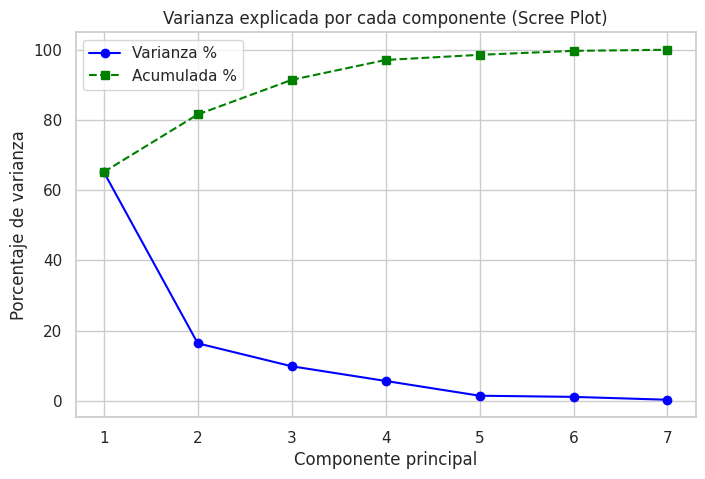

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza)+1), varianza * 100, marker='o', linestyle='-', color='blue', label='Varianza %')
plt.plot(range(1, len(varianza)+1), varianza_acumulada * 100, marker='s', linestyle='--', color='green', label='Acumulada %')
plt.title('Varianza explicada por cada componente (Scree Plot)')
plt.xlabel('Componente principal')
plt.ylabel('Porcentaje de varianza')
plt.xticks(range(1, len(varianza)+1))
plt.legend()
plt.grid(True)
plt.show()

## **Conclusiones**


1.  El gráfico perceptual en 3D puede ser recomendable si las primeras tres componentes principales explican una parte considerable de la varianza acumulada (idealmente más del 70%).
2. Útil cuando 2D no capta suficiente varianza (por ejemplo, PC1+PC2 < 60%).
3. Útil cuando la PC3 aporta significativamente y quieres visualizar agrupamientos o distancias más realistas.
4. Si tu público puede interpretar gráficos 3D con facilidad (útil en análisis exploratorios o presentaciones interactivas).


In [ ]:
# Lectura de datos
data=pd.read_excel("/content/drive/MyDrive/Analítica Para Mercadeo/Base de datos/Ejemplo Mapa de Posicionamiento.xlsx",sheet_name="Copia de Grupo2")
data

,ID,Marca,Sabor,Precio,Envase,Disponibilidad,Recompra
0,1,Marca D,Malo,Alto,Tradicional,Media,No
1,2,Marca E,Bueno,Medio,Feo,Media,Sí
2,3,Marca C,Regular,Alto,Tradicional,Baja,No
3,4,Marca E,Regular,Medio,Moderno,Alta,No
4,5,Marca E,Malo,Medio,Moderno,Alta,Sí
...,...,...,...,...,...,...,...
295,296,Marca E,Bueno,Medio,Feo,Alta,Sí
296,297,Marca E,Bueno,Medio,Tradicional,Alta,Sí
297,298,Marca C,Bueno,Medio,Tradicional,Media,Sí
298,299,Marca D,Malo,Bajo,Tradicional,Alta,No


In [ ]:
# Seleccionar solo las variables perceptuales
variables = ['Sabor', 'Precio', 'Envase', 'Disponibilidad', 'Recompra']
datos_perceptuales = data[variables]

In [ ]:
# Aplicamos MCA
import prince

mca = prince.MCA(n_components=2, random_state=42)
mca = mca.fit(datos_perceptuales)

In [ ]:
# Obtener las coordenadas
# Coordenadas de los individuos (observaciones)
coordenadas_ind = mca.transform(datos_perceptuales)
coordenadas_ind['Marca'] = data['Marca']  # Agregar la marca como etiqueta

In [ ]:
# Coordenadas de las modalidades (categorías)
coordenadas_mod = mca.column_coordinates(datos_perceptuales)

In [ ]:
# Varianzas explicadas
varianza_explicada = mca.eigenvalues_ / mca.total_inertia_
print(f"\nVarianza explicada Dimensión 1: {varianza_explicada[0]:.1%}")
print(f"Varianza explicada Dimensión 2: {varianza_explicada[1]:.1%}")


Varianza explicada Dimensión 1: 13.4%
Varianza explicada Dimensión 2: 13.1%


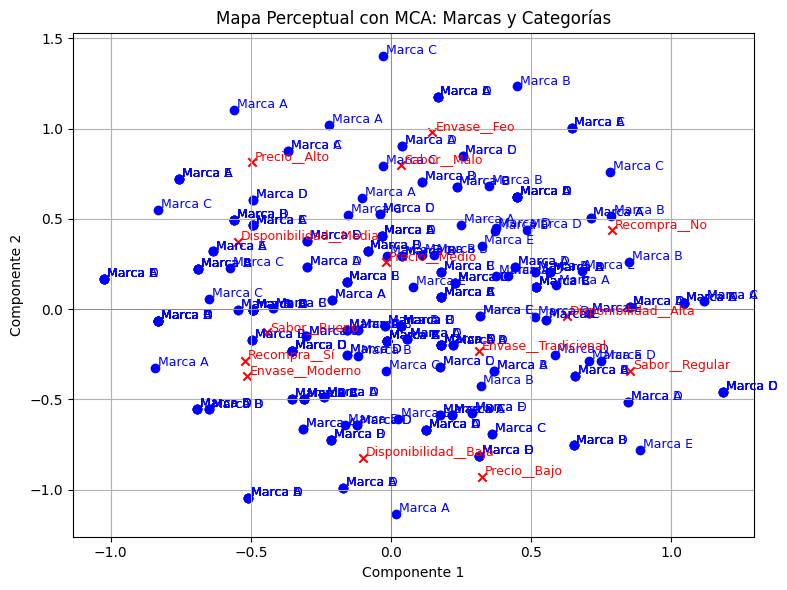

In [ ]:
# Graficamos el mapa perceptual


plt.figure(figsize=(8, 6))

# Graficamos las marcas
for i in range(len(coordenadas_ind)):
    x = coordenadas_ind.iloc[i, 0]
    y = coordenadas_ind.iloc[i, 1]
    marca = coordenadas_ind.iloc[i, 2]
    plt.scatter(x, y, color='blue')
    plt.text(x + 0.01, y + 0.01, marca, fontsize=9, color='blue')

# Graficamos modalidades (percepciones)
for i in range(len(coordenadas_mod)):
    x = coordenadas_mod.iloc[i, 0]
    y = coordenadas_mod.iloc[i, 1]
    modalidad = coordenadas_mod.index[i]
    plt.scatter(x, y, color='red', marker='x')
    plt.text(x + 0.01, y + 0.01, modalidad, fontsize=9, color='red')

# Líneas de referencia
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.title('Mapa Perceptual con MCA: Marcas y Categorías')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Promediar las coordenadas de los individuos por marca
coordenadas_promedio = coordenadas_ind.groupby('Marca')[[0, 1]].mean().reset_index()

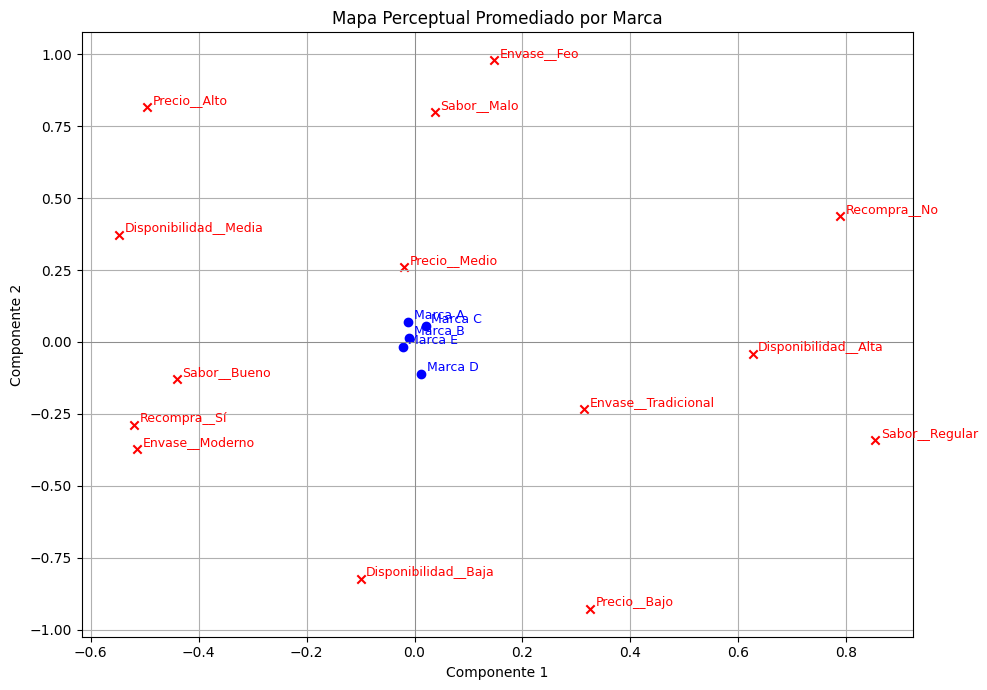

In [ ]:
plt.figure(figsize=(10, 7))

# Graficar marcas (promediadas)
for i in range(len(coordenadas_promedio)):
    x = coordenadas_promedio.iloc[i, 1]
    y = coordenadas_promedio.iloc[i, 2]
    marca = coordenadas_promedio.iloc[i, 0]
    plt.scatter(x, y, color='blue')
    plt.text(x + 0.01, y + 0.01, marca, fontsize=9, color='blue')

# Graficar modalidades (categorías)
for i in range(len(coordenadas_mod)):
    x = coordenadas_mod.iloc[i, 0]
    y = coordenadas_mod.iloc[i, 1]
    modalidad = coordenadas_mod.index[i]
    plt.scatter(x, y, color='red', marker='x')
    plt.text(x + 0.01, y + 0.01, modalidad, fontsize=9, color='red')

# Líneas de referencia
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.title('Mapa Perceptual Promediado por Marca')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.tight_layout()
plt.show()